<h1>Imports

In [8]:
!pip install seaborn
!pip install numpy
!pip install matplotlib
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------------ --------------------- 4.6/9.8 MB 98.7 MB/s eta 0:00:01
   ---------------------------------------  9.8/9.8 MB 105.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 90.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   --------------------------------------- 233.9/233.9 kB 14.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---- ----------------------------------- 5.2/44.5 MB 111.3 MB/s eta 0:00:01
   --------- ------------------------------ 10.9/44.5 MB 108.8 MB/s eta 0:00:01
   -------------- ------------------------- 15.6/44.5 MB 108.8 MB/s eta 0:00:01
   ------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from pyspark.sql import (SparkSession,
                        functions as F,
                        DataFrame,
                        Window)


<h3>Create spark session

In [2]:
spark = (SparkSession.builder 
    .appName("regressao_logistica") 
    .getOrCreate())
spark

<h2>Code

In [3]:
df = spark.read.csv('..\..\datasets\dados_introducao_regressao_logistica.csv')

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\bield\AppData\Local\Temp\ipykernel_20796\477831187.py:1: SyntaxWarning: invalid escape sequence '\.'
  df = spark.read.csv('..\..\datasets\dados_introducao_regressao_logistica.csv')


         VIF        Feature
0   6.388987          const
1  77.241379    study hours
2  69.793103  extra classes
3   2.655172    tasks ended
         Current function value: 0.000000
         Iterations: 35


C:\Users\bield\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\bield\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\bield\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\bield\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  wa

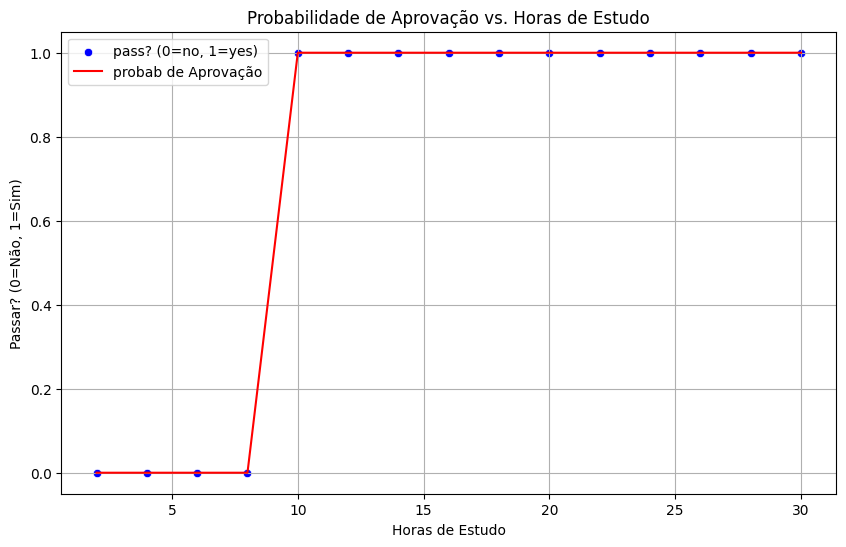

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dados
data = {
    'study hours': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
    'extra classes': [0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8],
    'tasks ended': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'pass?': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

X = df[['study hours', 'extra classes', 'tasks ended']]
y = df['pass?']

X_vif = sm.add_constant(X)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["Feature"] = X_vif.columns
print(vif)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

df['probab'] = result.predict(X)

# Plotagem
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study hours', y='pass?', data=df, label='pass? (0=no, 1=yes)', color='blue')
sns.lineplot(x='study hours', y='probab', data=df, label='probab de Aprovação', color='red')
plt.title('Probabilidade de Aprovação vs. Horas de Estudo')
plt.xlabel('Horas de Estudo')
plt.ylabel('Passar? (0=Não, 1=Sim)')
plt.legend()
plt.grid()
plt.show()
